In [42]:
import numpy as np
import pandas as pd
import sklearn

In [3]:
data=pd.read_csv('Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
datax = data[['TV','Radio','Newspaper']].to_numpy()
datay = data[['Sales']].to_numpy()

(xr,xc)=datax.shape
newx = np.ones(shape=(xr,xc+1))
newx[:,1:]=datax
newx.shape

(200, 4)

In [53]:
def getprediction(model,X):
    (xr,xc)=X.shape
    lx = np.ones(shape=(xr,xc+1))
    lx[:,1:]=X
    return np.dot(lx,model)
    

In [54]:
tmodel = np.random.randn(4,1)
pred = getprediction(tmodel,datax)
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
mean_absolute_error(pred,datay)

150.2251765367862

In [55]:
from numpy.linalg import inv
def getbestmodel(X,Y):
    return np.dot( (inv(np.dot(X.T,X))) , (np.dot(X.T,Y)) )

In [57]:
def newprediction(model,X):
    return np.dot(X,model)

In [58]:
bestmodel = getbestmodel(newx,datay)
yhat = newprediction(bestmodel,newx)

In [61]:
print("mean abs error:",mean_absolute_error(yhat,datay))
print("mean abs error perc:",mean_absolute_percentage_error(yhat,datay))

mean abs error: 1.2520112296870705
mean abs error perc: 0.11245010280461354


In [62]:
yhat

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872],
       [ 7.0322992 ],
       [17.28512918],
       [10.57712073],
       [ 8.82630048],
       [18.43436638],
       [20.81929952],
       [12.82365674],
       [23.22495716],
       [ 9.95168206],
       [14.16607293],
       [18.10076728],
       [14.7405382 ],
       [ 6.4891503 ],
       [16.5459329 ],
       [ 8.14651887],
       [15.6100386 ],
       [14.98951429],
       [17.05167344],
       [19.41053803],
       [ 9.14402389],
       [21.6339338 ],
       [11.3460929 ],
       [ 7.63888314],
       [18.86426829],
       [ 7.57483051],
       [17.00682618],
       [23.40590052],
       [15.62347779],
       [ 9.90868103],
       [20.44761039],
       [16.37766467],
       [17.2959832 ],
       [21.59580326],
       [13.96385684],
       [ 8.88787996],
       [15

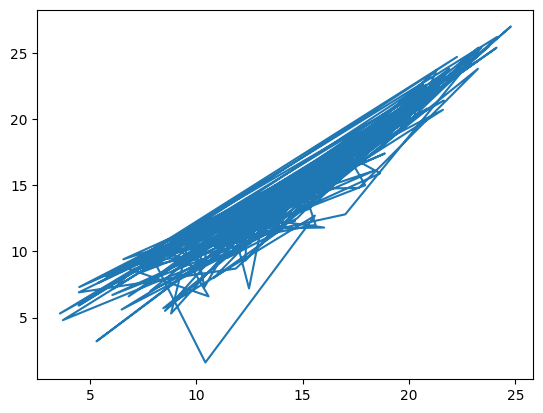

In [66]:
import matplotlib.pyplot as plt
plt.plot(yhat,datay)